# Sheet 3, Ex 1

### Christoph Breitfeld, Henry Krämerkämper, Linus Bölte

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

## a) plot and fit 6th degree polynomial

In [112]:
data_A = pd.read_csv('ex_a.csv')
print(data_A)

     x       y_0
0  0.5  0.099903
1  1.5  0.155093
2  2.5  0.211620
3  3.5  0.153054
4  4.5  0.145022
5  5.5  0.104727
6  6.5  0.049992
7  7.5  0.080588


In [56]:
# rewrite f(x) as design matrix A
A = np.column_stack([data_A.x**i for i in range(7)]) # shape = (data points, number of parameters)
params = np.linalg.inv(A.T@A)@A.T@data_A.y_0
# sum of square of differences
S = data_A.y_0.T @ data_A.y_0 - params.T @ A.T @ data_A.y_0 
# and variance of y data
varianceY = S/(A.shape[0] - A.shape[1])
yErr = np.sqrt(varianceY)
# yield error of params
pcov = varianceY * np.linalg.inv(A.T@A)
perr = np.sqrt(np.diag(pcov))

name = ['a','b','c','d','e','f','g']

for (n,p,e) in zip (name,params,perr):
    print(f'{n}: {p:.3}'+r'+/-'+f'{e:.3}')

a: 0.251+/-0.168
b: -0.579+/-0.54
c: 0.704+/-0.54
d: -0.337+/-0.242
e: 0.0769+/-0.0536
f: -0.00842+/-0.00577
g: 0.000355+/-0.00024


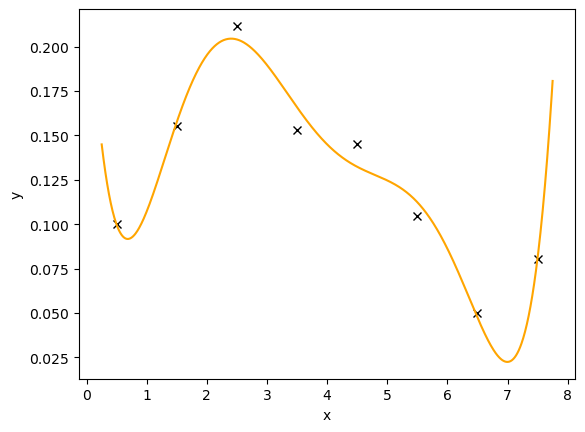

In [59]:
x = np.linspace(np.min(data_A.x)-0.25, np.max(data_A.x)+0.25, 1000)
y = np.sum([params[i]*x**i for i in range(7)], axis=0)

plt.figure()

plt.plot(data_A.x,data_A.y_0,'kx',linestyle=' ',markersize=6)
plt.plot(x, y,color='orange',linestyle='-')

plt.xlabel('x')
plt.ylabel('y');

## b) plot and fit ex_A.csv use regularization via second derivative

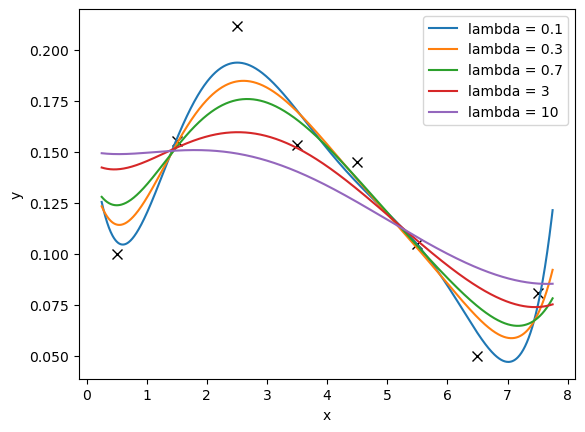

In [72]:
lam = [0.1,0.3, 0.7, 3, 10]

C = np.array([[-1, 1, 0, 0, 0, 0, 0, 0],
              [1, -2, 1, 0, 0, 0, 0, 0],
              [0, 1, -2, 1, 0, 0, 0, 0],
              [0, 0, 1, -2, 1, 0, 0, 0],
              [0, 0, 0, 1, -2, 1, 0, 0],
              [0, 0, 0, 0, 1, -2, 1, 0],
              [0, 0, 0, 0, 0, 1, -2, 1],
              [0, 0, 0, 0, 0, 0, 1, -1]])

def Gamma(lam,C,A):
    return np.sqrt(lam)*C@A
    
paramsREG = [np.linalg.inv(A.T @ A + Gamma(l,C,A).T @ Gamma(l,C,A)) @ A.T @ data_A.y_0 for l in lam]

yREG = [np.sum([row[i]*x**i for i in range(7)], axis=0) for row in paramsREG]

plt.plot(data_A.x,data_A.y_0,'kx',linestyle=' ',markersize=7)
for (val,l) in zip (yREG,lam):
    plt.plot(x, val,linestyle='-', label=f'lambda = {l}')

plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y');

## c) new measurement, fit using weights

In [142]:
data_C = pd.read_csv('ex_c.csv')
xData = data_C.x.to_numpy()
data_C = data_C.drop('x',axis=1).to_numpy()

In [143]:
# calculate means and standard error mean
yMean = np.mean(data_C,axis=1)
ySem = np.std(data_C,axis=1)/np.sqrt(len(data_C[:]))
print(yMean,ySem)

[0.13514866 0.17540304 0.18737527 0.15696213 0.12354977 0.08756026
 0.06937101 0.06462986] [0.0099476  0.0102104  0.01205981 0.01205755 0.00818591 0.00681301
 0.00433621 0.00470194]


In [146]:
# weight matrix
W = np.diag(1/ySem**2)
# x stayed the same so we can reuse the design matrix
paramsW = np.linalg.inv(A.T @ W @ A) @ A.T @ W @ yMean
# get pcov
pcovW = np.linalg.inv(A.T @ W @ A)
perrW = np.sqrt(np.diag(pcovW))

for (n,p,e) in zip (name,paramsW,perrW):
    print(f'{n}: {p:.3}'+r'+/-'+f'{e:.3}')

a: 0.117+/-0.0774
b: 0.0227+/-0.246
c: 0.0377+/-0.243
d: -0.0244+/-0.107
e: 0.00505+/-0.0231
f: -0.000453+/-0.00244
g: 1.53e-05+/-9.93e-05


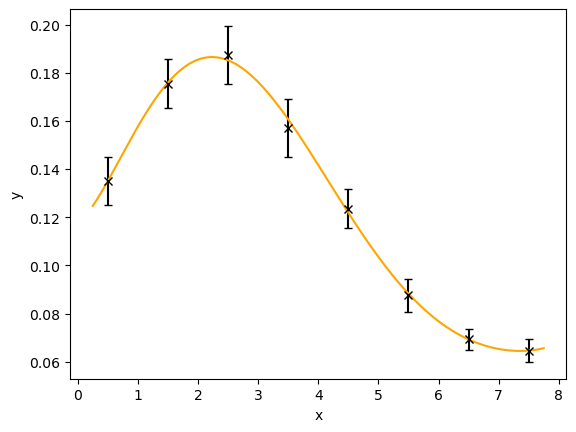

In [145]:
yW = np.sum([paramsW[i]*x**i for i in range(7)], axis=0)

plt.errorbar(xData, yMean, yerr=ySem, marker='x', linestyle=' ', capsize=3, color='k')
plt.plot(x, yW, '-', color='orange')
plt.xlabel('x')
plt.ylabel('y');